## Visualizations

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [75]:
data = pd.read_csv('heart.csv')
data.rename(columns={'age':'Age',
                     'sex':'Sex',
                     'cp': 'Chest Pain',
                     'trestbps':'Resting Blood Pressure',
                     'chol':'Cholestrol',
                     'fbs':'Blood Sugar',
                     'restecg':'Resting ECG',
                     'thalach': 'Max Heart Rate',
                     'exang': 'Exercise Induced Angina',
                     'oldpeak': 'Depression',
                     'slope': 'Slope',
                     'ca': 'Vessels colored by flourosopy',
                     'thal': 'Thallium',
                     'target': 'Heart Condition'
},inplace=True)

#### Correlation of the data

Text(0.5, 1.0, 'Relationship between the variables')

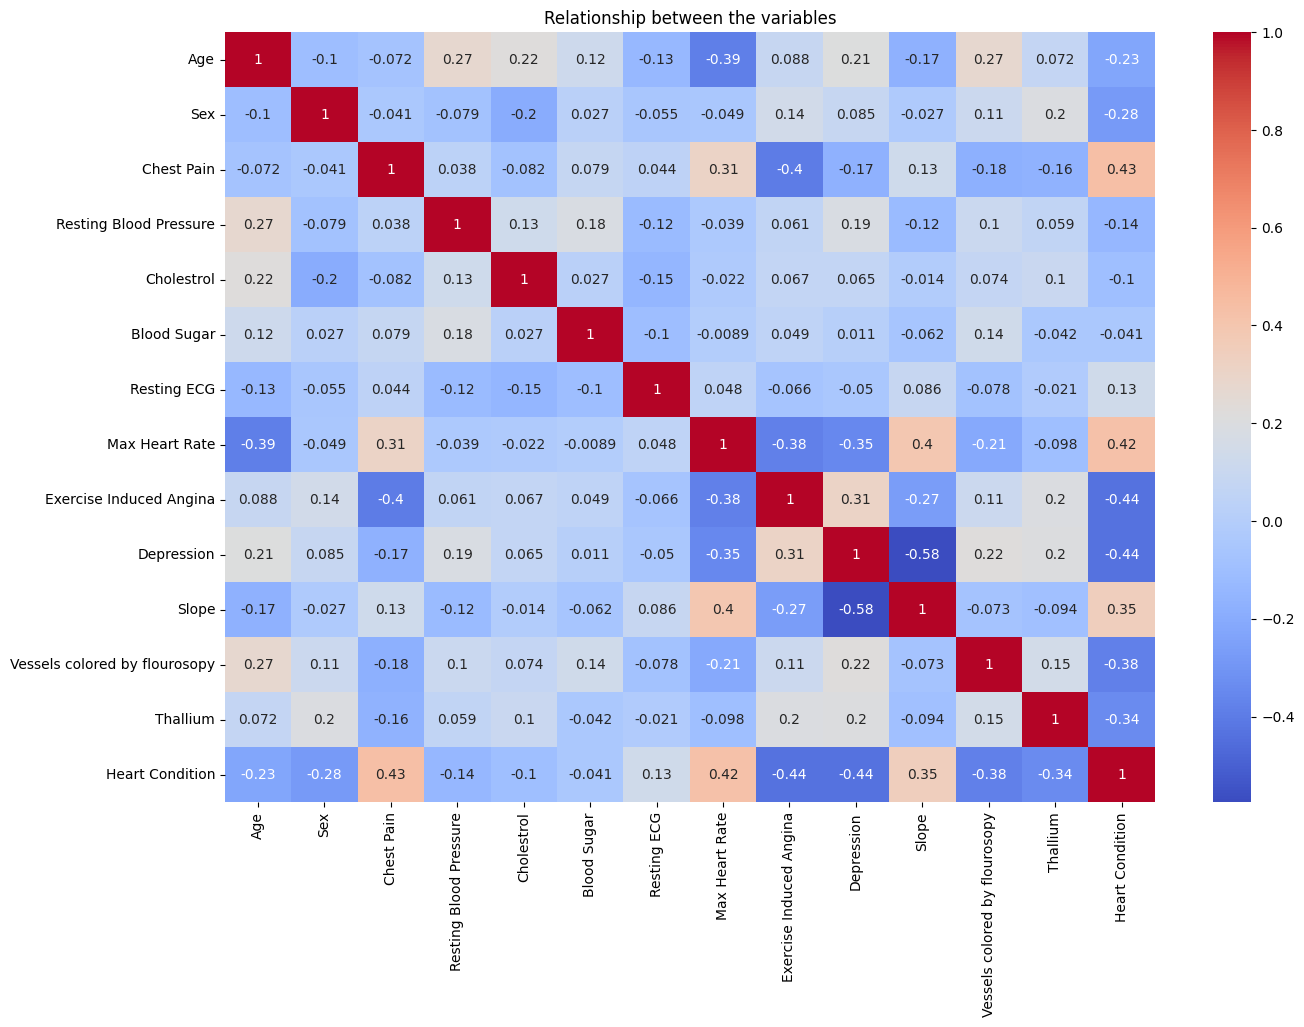

In [64]:
plt.rcParams['figure.figsize'] = 15, 10
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)
plt.title('Relationship between the variables')

Our analysis of the correlation matrix revealed predominantly inverse relationships within our dataset. Additionally, we noted a few instances of positive correlation, albeit with very weak coefficients. This presented challenges in selecting suitable features for model training.

In [46]:
norminal_attribute = ["Sex", "Chest Pain", "Blood Sugar", "Resting ECG", "Exercise Induced Angina", "Slope", "Heart Condition"]

##### Subplot Visualization for the norminal attribute

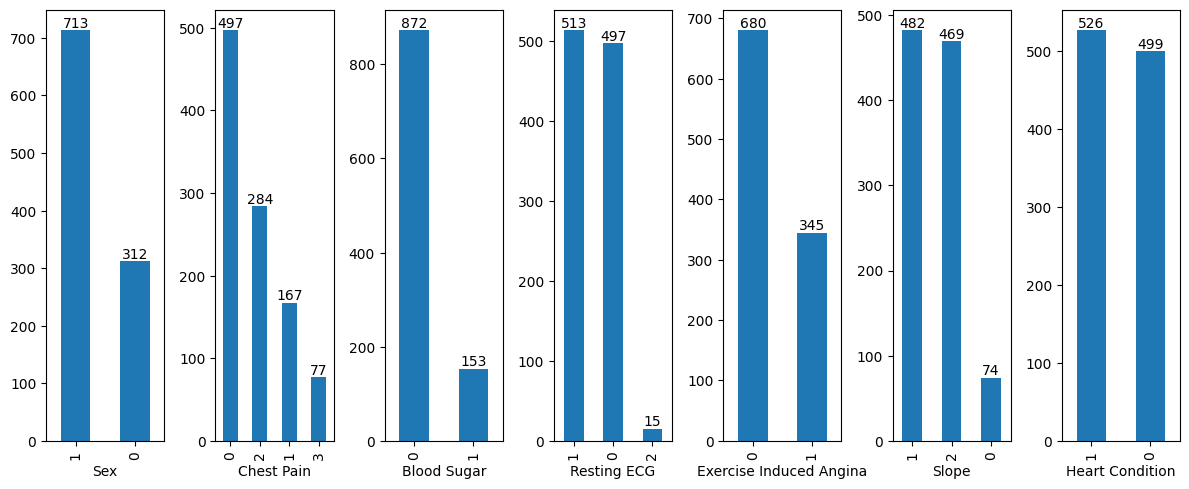

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(12, 5))
for i, j in enumerate(norminal_attribute):
    data[j].value_counts().plot(kind="bar", ax=axes[i])
    for container in axes[i].containers:
        axes[i].bar_label(container)
plt.tight_layout()
plt.show()

Graphical representations of the norminal attributes

#### Bar chart for better analysis

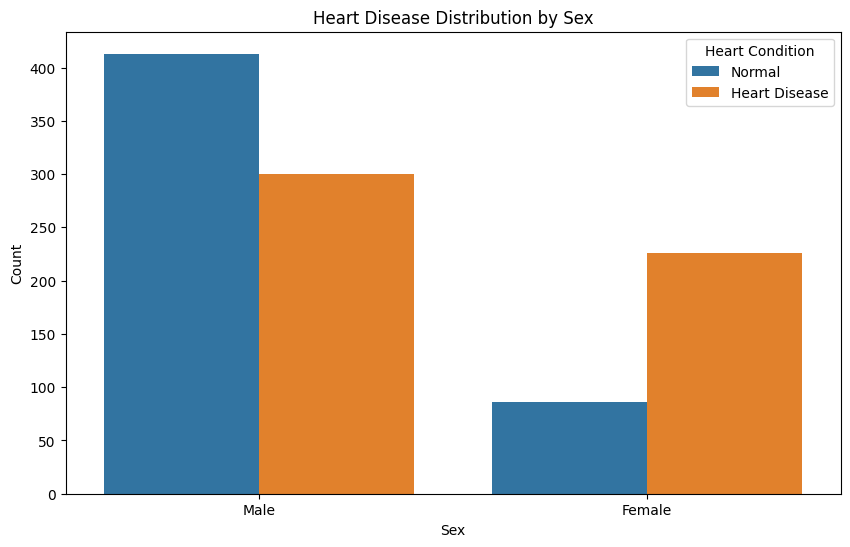

In [48]:
data['Heart Condition'] = data['Heart Condition'].map({0: 'Normal', 1: 'Heart Disease'})
data['Sex'] = data['Sex'].map({0: 'Female', 1: 'Male'})

plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Heart Condition', data=data)
plt.title('Heart Disease Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
# plt.xticks(rotation=45, ha='right')
plt.show()

The dataset reveals a clear gender disparity, with men comprising the majority. Analysis indicates that two-thirds of the male population exhibit normal heart conditions, while one-third suffer from heart disease. Conversely, among females, two-thirds are afflicted with heart disease, with one-third classified as having normal heart conditions. Therefore, it can be concluded that gender plays a significant role in the prevalence of heart disease within this population.

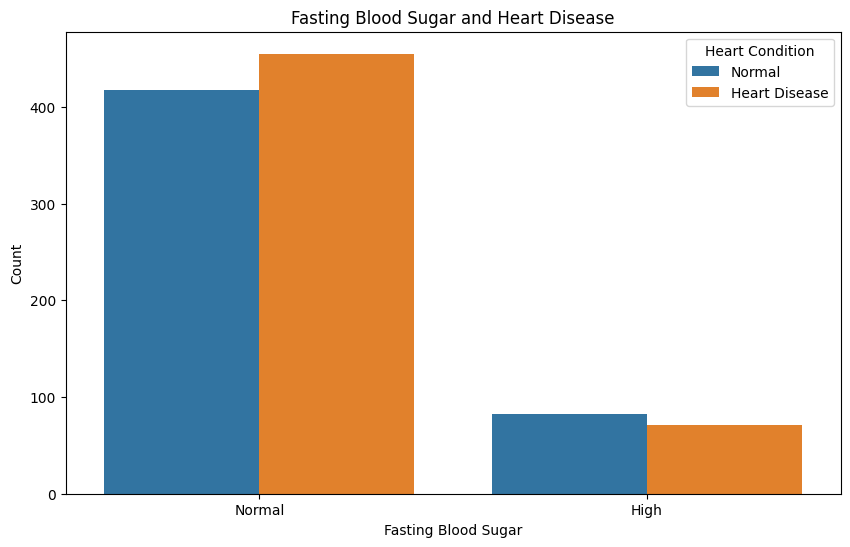

In [81]:
# Converting 'fasting blood sugar' to categorical for better visualization
data['Blood Sugar'] = data['Blood Sugar'].map({0: 'Normal', 1: 'High'})
data['Heart Condition'] = data['Heart Condition'].map({0: 'Normal', 1: 'Heart Disease'})

plt.figure(figsize=(10, 6))
sns.countplot(x='Blood Sugar', hue='Heart Condition', data=data)
plt.title('Fasting Blood Sugar and Heart Disease')
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Count')
plt.show()

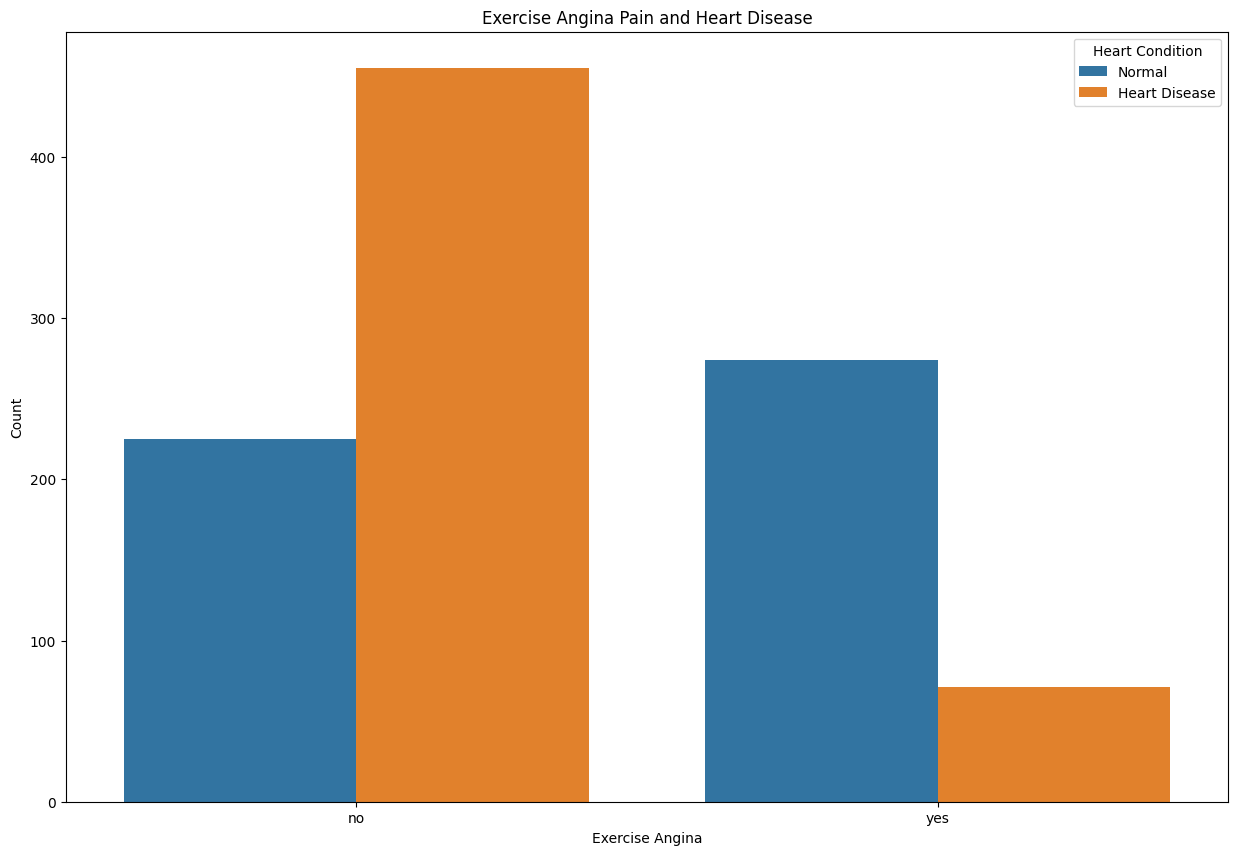

In [55]:
# Converting exercise angina to categorical for better visualization
data['Exercise Induced Angina'] = data['Exercise Induced Angina'].map({1: 'yes', 0: 'no'})
data['Heart Condition'] = data['Heart Condition'].map({0: 'Normal', 1: 'Heart Disease'})

sns.countplot(x='Exercise Induced Angina', hue='Heart Condition', data=data)
plt.title('Exercise Angina Pain and Heart Disease')
plt.xlabel('Exercise Angina')
plt.ylabel('Count')

plt.show()

The data indicates a notable trend: a higher number of patients who did not experience angina during exercise exhibit the highest rate of heart disease. Conversely, a smaller subset of patients who did experience angina during exercise shows the lowest rate of heart disease. This means that excercise has no effect on Heart Disease.

In [ ]:
data['Sex'] = data['Sex'].map({0: 'Female', 1: 'Male'})
data.groupby(['Sex', pd.cut(data['Age'], bins=[0, 20, 40, 60, 80, 100])]).size().unstack().plot(kind='bar', stacked=True)
plt.title('Sex Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.show()

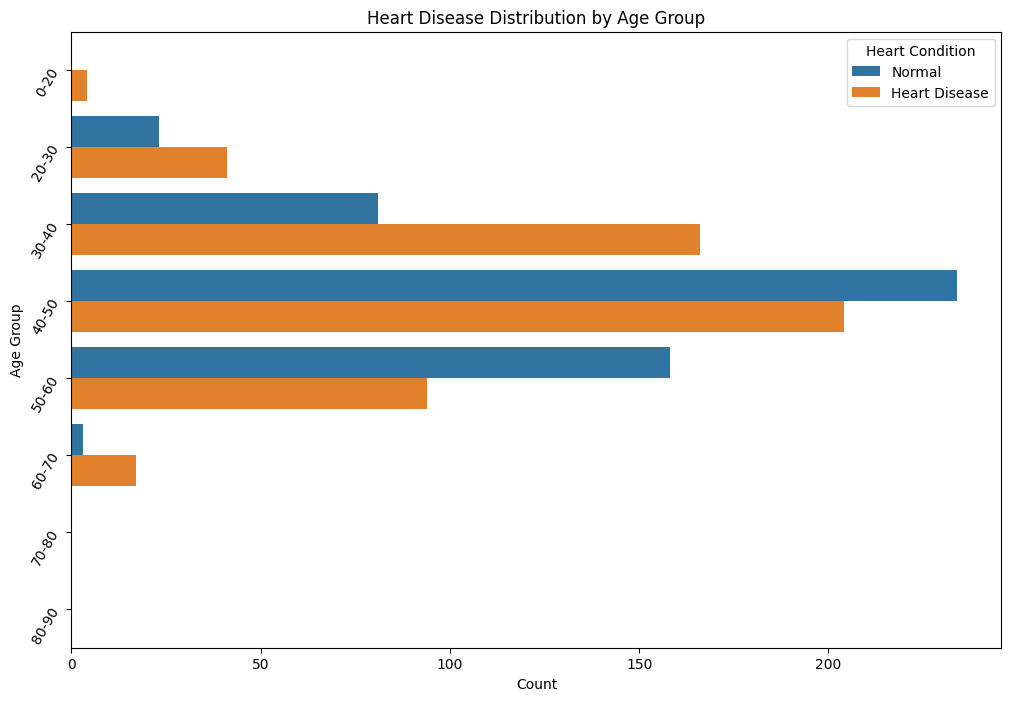

In [60]:
data['Heart Condition'] = data['Heart Condition'].map({0: 'Normal', 1: 'Heart Disease'})
age_bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]

data['Age_group'] = pd.cut(data['Age'], bins=age_bins, labels=['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])

plt.figure(figsize=(12, 8))
sns.countplot(y='Age_group', hue='Heart Condition', data=data)
plt.title('Heart Disease Distribution by Age Group')
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.yticks(rotation=60, ha='right')
plt.show()

Our data records a larger percentage of heart disease amongnst patients betwwen the age range of 30 - 60

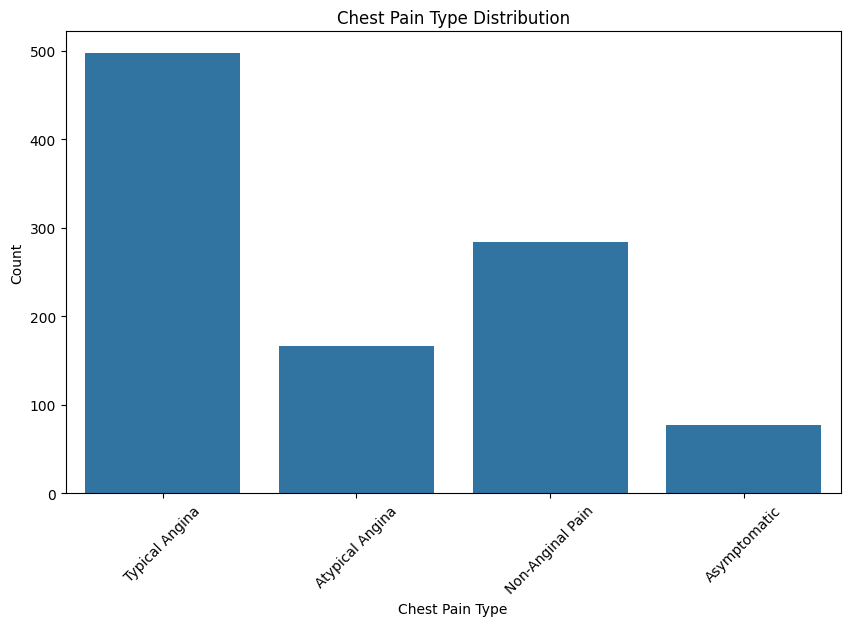

In [66]:
# Converting 'chest pain type' to categorical for better visualization
data['Chest Pain'] = data['Chest Pain'].map({0: 'Typical Angina', 1: 'Atypical Angina', 2: 'Non-Anginal Pain', 3: 'Asymptomatic'})

plt.figure(figsize=(10, 6))
sns.countplot(x='Chest Pain', data=data)
plt.title('Chest Pain Type Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Pie chart distribution for diverse representation of the data

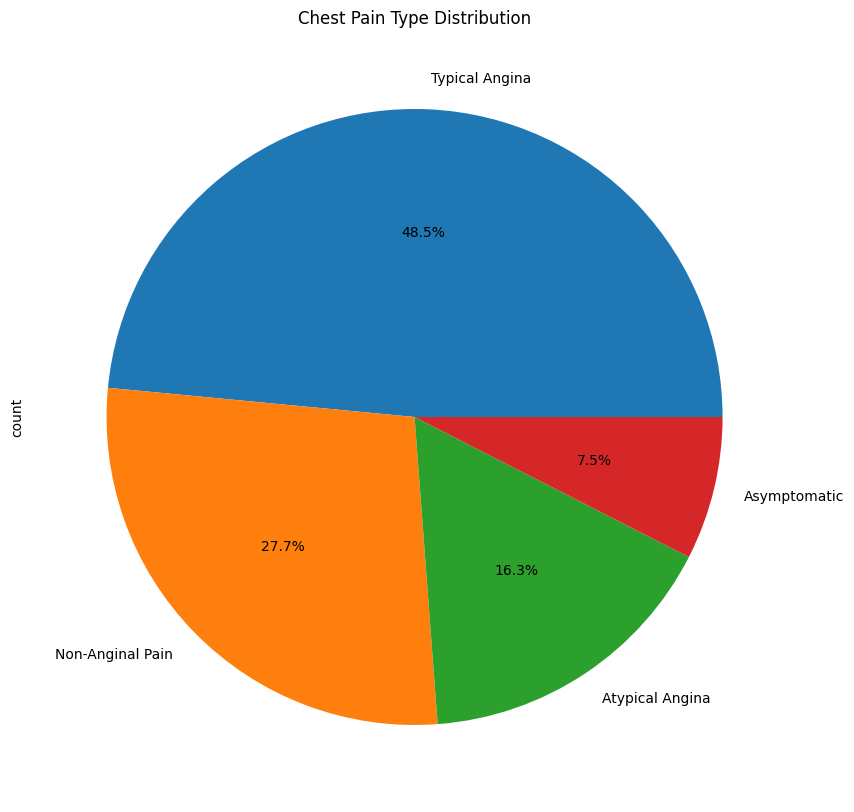

In [67]:
data['Chest Pain'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Chest Pain Type Distribution')
plt.show()

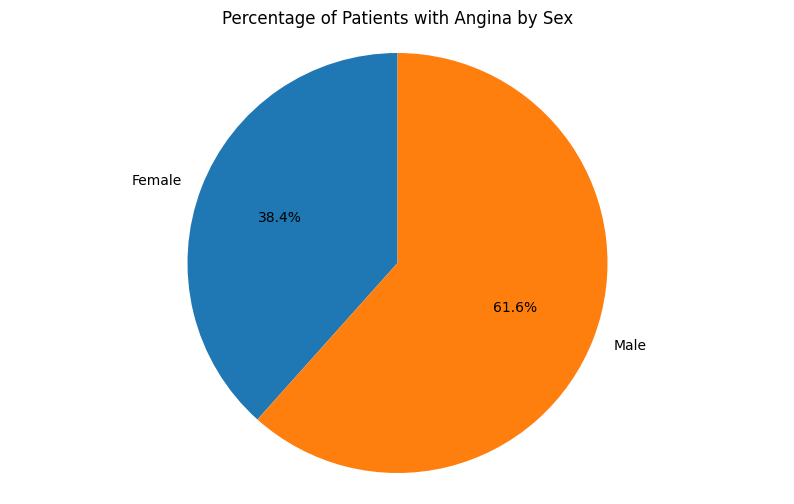

In [80]:
angina_patients = data[data['Chest Pain'] == 2]

angina_percentage = angina_patients.groupby('Sex')['Chest Pain'].count() / len(angina_patients) * 100

angina_percentage.index = angina_percentage.index.map({0: 'Female', 1: 'Male'})

plt.figure(figsize=(10, 6))
plt.pie(angina_percentage, labels=angina_percentage.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Patients with Angina by Sex')
plt.axis('equal')
plt.show()


The pie chart illustrates the distribution of sexes and the percentages of chest pain types within each group.

In [83]:
import plotly.graph_objects as go


# Example data
conditions = ['Chest Pain', 'Slope', 'Thallium']

ages = [data[data['Heart Condition'] == 'Chest Pain']['Age'].mean(), data[data['Heart Condition'] == 'Slope']['Age'].mean(), data[data['Heart Condition'] == 'Thallium']['Age'].mean()]
bp = [data[data['Heart Condition'] == 'Chest Pain']['Resting Blood Pressure'].mean(), data[data['Heart Condition'] == 'Slope']['Resting Blood Pressure'].mean(), data[data['Heart Condition'] == 'Thallium']['Resting Blood Pressure'].mean()]
cholestrol = [data[data['Heart Condition'] == 'Chest Pain']['Cholestrol'].mean(), data[data['Heart Condition'] == 'Slope']['Cholestrol'].mean(), data[data['Heart Condition'] == 'Thallium']['Cholestrol'].mean()]

# Define the categories for the radar chart
categories = ['Age', 'Resting Blood Pressure', 'Cholestrol']

# Create the radar chart
fig = go.Figure(data=[
    go.Scatterpolar(r=ages, theta=categories, name='Chest Pain'),
    go.Scatterpolar(r=bp, theta=categories, name='Slope'),
    go.Scatterpolar(r=cholestrol, theta=categories, name='Thallium')
])

fig.update_layout(
    title='Comparison of Heart Conditions',
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max(ages + bp + cholestrol) * 1.1] # Adjust the range to fit your data
        )
    ),
    showlegend=True
)

fig.show()


ages = [
    data[(data['Heart Condition'] == 'Chest Pain') & (data['Chest Pain'] == 'typical angina')]['Age'].mean(),
    data[(data['Heart Condition'] == 'Chest Pain') & (data['Chest Pain'] == 'atypical angina')]['Age'].mean(),
    data[(data['Heart Condition'] == 'Chest Pain') & (data['Chest Pain'] == 'non-anginal pain')]['Age'].mean(),
    data[(data['Heart Condition'] == 'Chest Pain') & (data['Chest Pain'] == 'asymptomatic')]['Age'].mean(),
    # Add more conditions as needed
]
bp = [
    data[(data['Heart Condition'] == 'Slope') & (data['Slope'] == 'upsloping')]['Resting Blood Pressure'].mean(),
    data[(data['Heart Condition'] == 'Slope') & (data['Slope'] == 'flat')]['Resting Blood Pressure'].mean(),
    data[(data['Heart Condition'] == 'Slope') & (data['Slope'] == 'typical angina')]['Resting Blood Pressure'].mean(),
    # Add more conditions as needed
]
cholestrol = [
    data[(data['Heart Condition'] == 'Chest Pain') & (data['Chest Pain'] == 'typical angina')]['Cholestrol'].mean(),
    data[(data['Heart Condition'] == 'Chest Pain') & (data['Chest Pain'] == 'atypical angina')]['Cholestrol'].mean(),
    # Add more conditions as needed
]

# Define the categories for the radar chart
categories = ['Age', 'Resting Blood Pressure', 'Cholestrol']

# Create the radar chart
fig = go.Figure(data=[
    go.Scatterpolar(r=ages, theta=categories, name='Condition 1 - Typical Angina'),
    go.Scatterpolar(r=bp, theta=categories, name='Condition 2 - Atypical Angina'),
    # Add more conditions as needed
])

fig.update_layout(
    title='Comparison of Heart Conditions',
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max(ages + bp + cholestrol) * 1.1] # Adjust the range to fit your data
        )
    ),
    showlegend=True
)

fig.show()